<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Установка-и-импорты-библиотек" data-toc-modified-id="Установка-и-импорты-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Установка и импорты библиотек</a></span></li><li><span><a href="#Откроем-данные,-посмотрим-содержимое,-проверим-типы-данных-и-наличие-дубликатов" data-toc-modified-id="Откроем-данные,-посмотрим-содержимое,-проверим-типы-данных-и-наличие-дубликатов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Откроем данные, посмотрим содержимое, проверим типы данных и наличие дубликатов</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Проверка-ряда-на-стационарность" data-toc-modified-id="Проверка-ряда-на-стационарность-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка ряда на стационарность</a></span></li><li><span><a href="#Очистика-значений-от-выбросов" data-toc-modified-id="Очистика-значений-от-выбросов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Очистика значений от выбросов</a></span></li><li><span><a href="#Анализ-сезонности" data-toc-modified-id="Анализ-сезонности-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ сезонности</a></span></li><li><span><a href="#Анализ-остатков-(шумов)" data-toc-modified-id="Анализ-остатков-(шумов)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ остатков (шумов)</a></span></li><li><span><a href="#Вывод-по-анализу-временного-ряда:" data-toc-modified-id="Вывод-по-анализу-временного-ряда:-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод по анализу временного ряда:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#ARIMA" data-toc-modified-id="ARIMA-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ARIMA</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Фирма «Классное такси» собрала статистику о заказах такси в аэропортах за прошлые периоды. Для привлечения большего числа водителей во время пиковой загруженности, необходимо предсказать количество заказов такси на следующий час. Ваша задача - разработать модель для такого прогнозирования. 🚕

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Установка и импорты библиотек

In [2]:
pip install pmdarima 

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   --- ------------------------------------ 61.4/614.7 kB 1.1 MB/s eta 0:00:01
   ------------- -------------------------- 204.8/614.7 kB 1.8 MB/s eta 0:00:01
   ------------------ --------------------- 286.7/614.7 kB 1.8 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/614.7 kB 1.8 MB/s eta 0:00:01
   ------------------------------ --------- 471.0/614.7 kB 1.8 MB/s eta 0:00:01
   ----------------------------------- ---- 553.0/614.7 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.8 MB 4.5 MB/s eta 0:00:01
   -- ------------------------------------- 0.2/2.8 MB 2.4 MB/s eta 0:00:02

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from pmdarima import auto_arima 
from statsmodels.tsa.seasonal import seasonal_decompose

pd.options.mode.chained_assignment = None

### Откроем данные, посмотрим содержимое, проверим типы данных и наличие дубликатов

In [4]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [5]:
df.shape

(26496, 1)

In [6]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [8]:
df[df.index.duplicated()]

,num_orders
datetime,


**Ресемплирование по одному часу**

In [9]:
df = df.resample('1H').sum()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


## Анализ

### Проверка ряда на стационарность

Для получения более точных предсказаний следует использовать стационарный временной ряд.


Тест **Дики-Фуллера** используется для проверки стационарности временного ряда. Стационарный ряд имеет постоянные статистические свойства, такие как постоянное среднее значение и постоянная дисперсия, которые не меняются со временем.

Тест Дики-Фуллера основан на предположении, что временной ряд можно аппроксимировать авторегрессионной моделью с линейным трендом и автокорреляцией. Он проверяет гипотезу о наличии единичного корня в ряду (т.е. о его нестационарности).

Процедура теста Дики-Фуллера заключается в оценке авторегрессионной модели выбранного порядка и проверке коэффициента перед лаговым значением ряда. Если этот коэффициент статистически значимо отличается от нуля, это означает наличие нестационарности в ряде.

Результат теста Дики-Фуллера представлен в виде статистики теста и критических значений. Если статистика теста меньше критических значений, то нулевая гипотеза о наличии единичного корня отвергается, и ряд считается стационарным.

In [11]:
# Проведем тест Дики-Фуллера на стационарность
result = adfuller(df['num_orders'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.068924
p-value: 0.028940
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Статистика теста больше 1% критического значения -> ряд "немного" нестационарен. Проверим визуально.

Построим график заказов

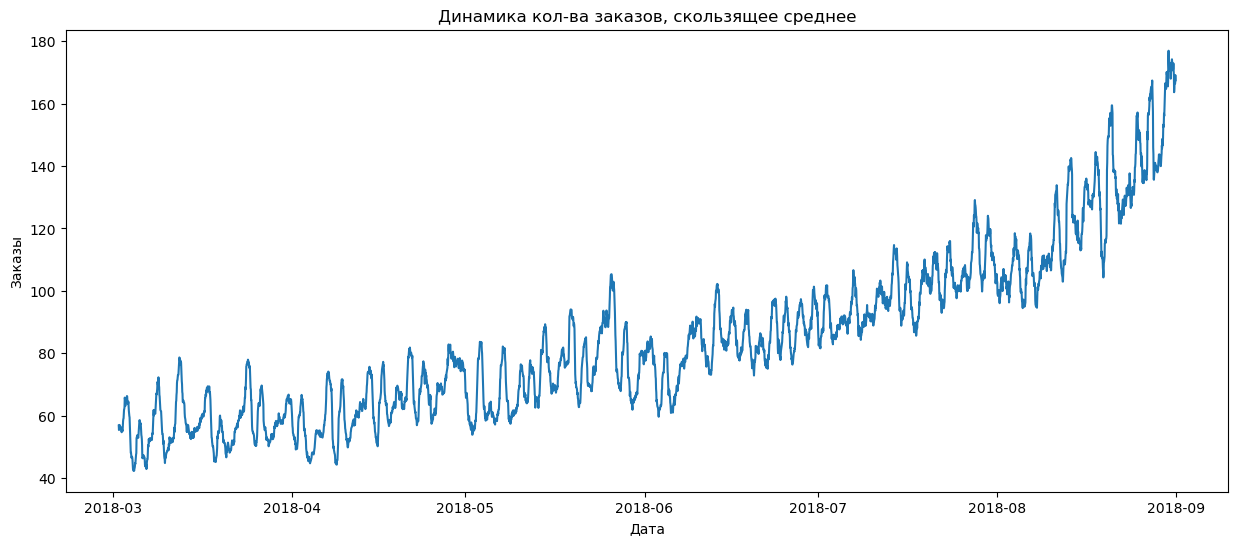

In [12]:
plt.figure(figsize=(15,6))
plt.plot(df['num_orders'].rolling(window=24).mean())
plt.title('Динамика кол-ва заказов, скользящее среднее')
plt.xlabel('Дата')
plt.ylabel('Заказы')
plt.show()

Данные действительно имеют восходящий тренд, т.е. среднее меняется со временем -> ряд нестационарен.  
Проведем дифференцирование первого порядка, посмотрим на результат.

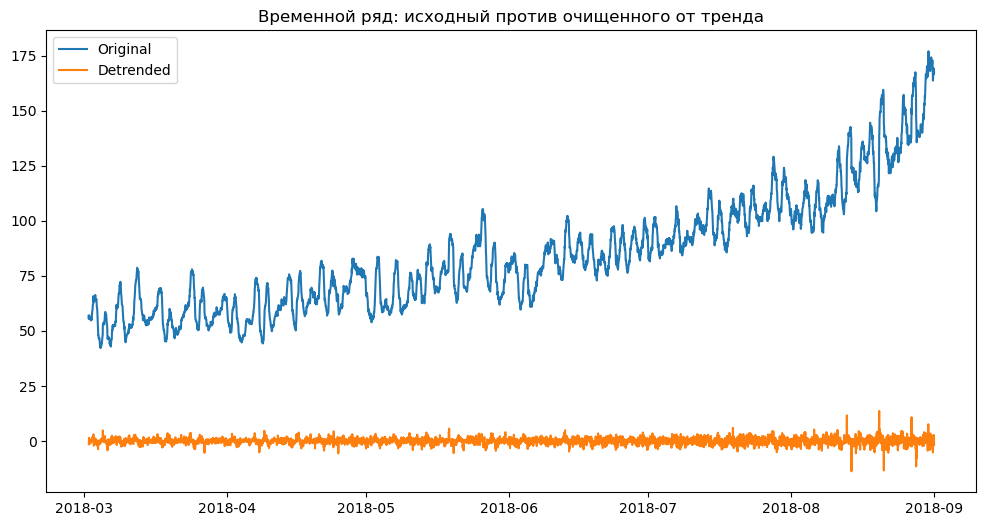

In [13]:
df_original = df.copy()
df = df.diff().dropna()
# Визуализируем результаты
plt.figure(figsize=(12, 6))
plt.plot(df_original.rolling(window=24).mean(), label='Original')
plt.plot(df.rolling(window=24).mean(), label='Detrended')
plt.title('Временной ряд: исходный против очищенного от тренда')
plt.legend()
plt.show()

In [14]:
# Проведем тест Дики-Фуллера на очищенном от тренда ряду
result = adfuller(df)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.793234
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Теперь ряд однозначно стационарен, т.к. статистика теста намного ниже 1% критического значения.

### Очистика значений от выбросов  
Построим гистограмму по полученным очищенным от тренда данным

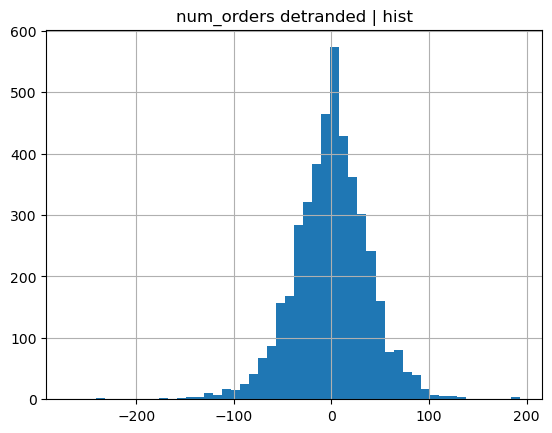

In [15]:
df.hist(bins=50)
plt.title('num_orders detranded | hist')
plt.show()

Видно, что есть небольшое кол-во выбиывающихся значений, которые будут усложнять обучение.  
Выведем 1%, 50% и 99% персентили

In [16]:
descr = df.describe(percentiles=[.01, .5, .99])[4:7]
descr

,num_orders
1%,-105.86
50%,1.00
99%,91.00


Заменяем экстремальные значения

In [17]:
# сначала сделаем выбросы пустыми
df.loc[(df > descr.loc['99%'])['num_orders'] |
   (df < descr.loc['1%'])['num_orders'], 'num_orders'] = None

# затем применим метод линейной интерполяции, который основывается на соседних значениях
df = df.interpolate()

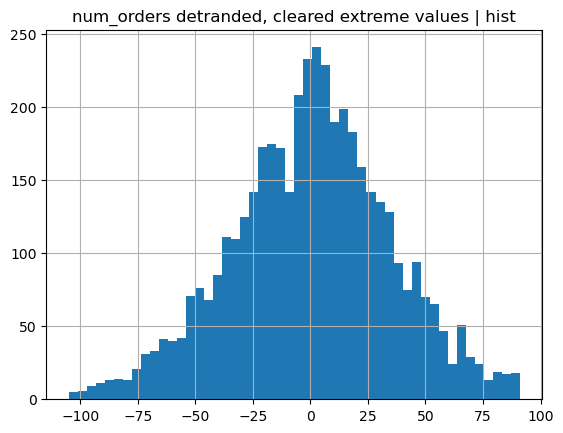

In [18]:
df.hist(bins=50)
plt.title('num_orders detranded, cleared extreme values | hist')
plt.show()

### Анализ сезонности

In [19]:
df['hour'] = df.index.hour

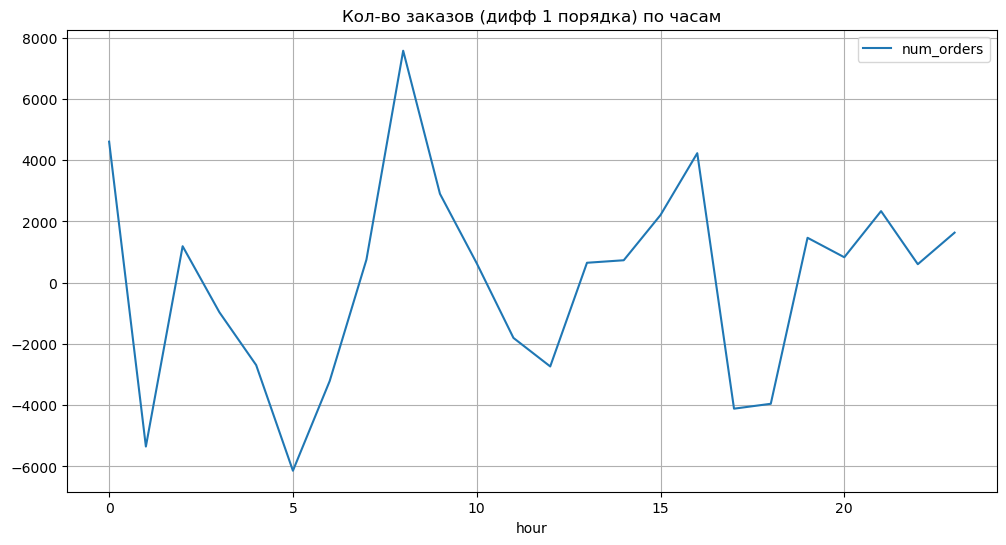

In [20]:
df.groupby(['hour']).sum().plot(grid=True, figsize=(12,6));
plt.title('Кол-во заказов (дифф 1 порядка) по часам')
plt.show()

Здесь мы можем увидеть, что кол-во заказов с 0 до 5 утра почти все время падает относительно предыдущего часа, т.к. значение метрики ниже нуля. Затем идет резкий пик, т.е. каждый час заказов становится всё больше, чем в предыдыщий час, и так до 8 утра, затем идет спад и т.д.  
**Вывод: присутствует сезонность по часам**, следовательно, признак часа стоит использовать в машинном обучении.

In [21]:
df['dayofweek'] = df.index.dayofweek

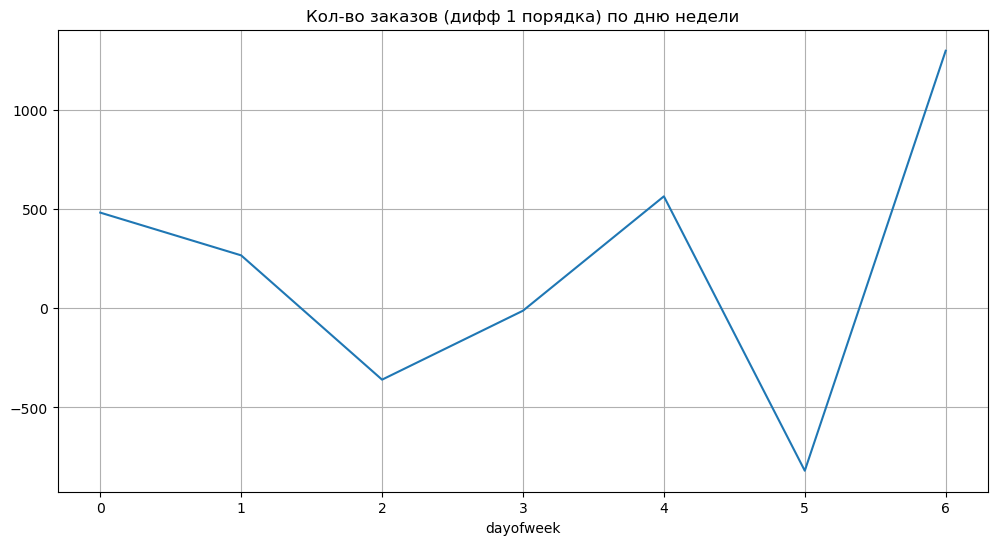

In [22]:
df.groupby(['dayofweek'])['num_orders'].sum().plot(grid=True, figsize=(12,6));
plt.title('Кол-во заказов (дифф 1 порядка) по дню недели')
plt.show()

Кол-во заказов в разные дни недели неоднородно, следовательно, и этот признак позволит улучшить качество модели.

In [23]:
df['month'] = df.index.month

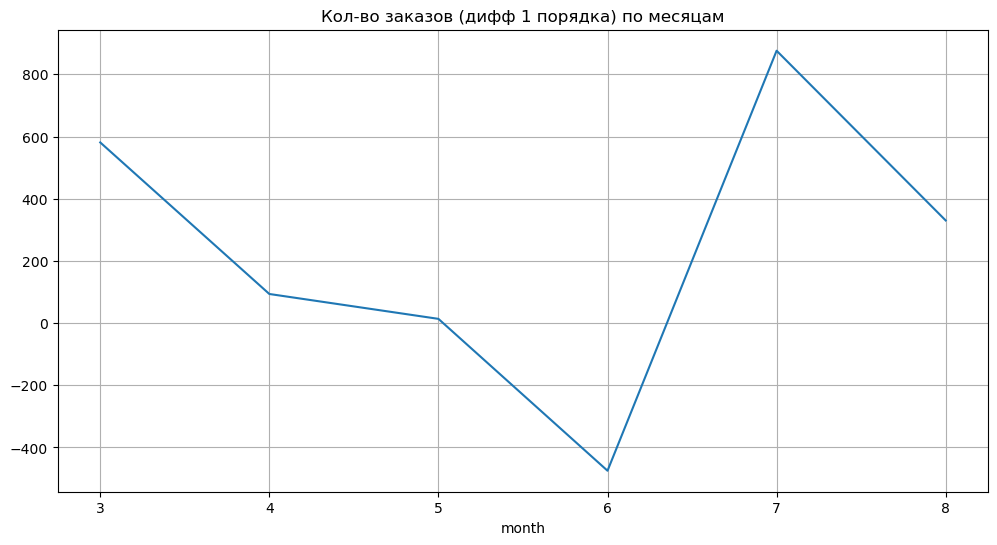

In [24]:
df.groupby(['month'])['num_orders'].sum().plot(grid=True, figsize=(12,6));
plt.title('Кол-во заказов (дифф 1 порядка) по месяцам')
plt.show()

**Вывод:** кол-во заказов относительно предыдущего месяца расет в апреле и мае. В июне был спад относительно мая, затем резкий рост к июлю, и чуть менее резкий - в августе. Т.е. тренд непостоянный. Однако в отличие от данных по часам или по дням недели, колебания тут незначительные, от -400 до +800, а также у нас нет нескольких одинаковых месяцев (например, трех июней), чтобы по признаку месяца можно было делать корректные выводы. Да и времена года (весна и лето) также немного похожи по погоде. Данный признак лучше **исключить из анализа**. 

In [25]:
# пока удаляем признаки - в дальнейшем они будут генерироваться при обучении функцией
df.drop(columns=['hour', 'dayofweek', 'month'], inplace=True)

### Анализ остатков (шумов)

Чтобы проверить адекватность предсказаний в последний период, проверим размер остатков по датам

In [26]:
decomposition = seasonal_decompose(df['num_orders'])
resid = decomposition.resid

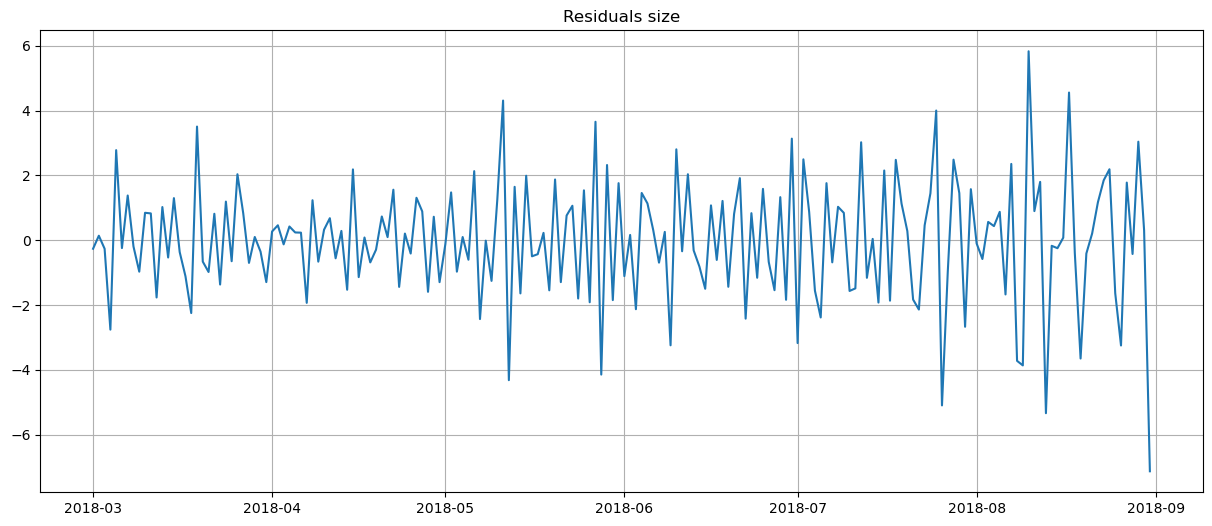

In [27]:
plt.figure(figsize=(15, 6))
# для адекватности отображения на графике ресемплируем по 1 дню
plt.plot(resid.resample('1D').mean()) 
plt.grid()
plt.title('Residuals size')
plt.show()

**Вывод**  
Разброс средних остатков к концу графика больше, значит, в тестовую выборку попадает чуть больше данных, которые сложно объяснить и на которых модели будет сложнее предсказывать. Поэтому относительно большая (по сравнению с другими задачами машинного обучения) разница между метриками при обучении и исследовании, и между тестовой выборкой, не обязательно будет объясняться только переобучением модели.

### Вывод по анализу временного ряда:
- Данные приведены к стационарности
- Очищены выбросы
- Итоговое распределение значений выглядит нормальным
- Проанализирована сезонность по часам, неделям и месяцам. Принято решение брать в анализ признак часа и дня недели
- Растущие к концу выборки остатки (шумы) говорят о попадании в выборку большого кол-ва сложно объяснимых отклонений, что будет ухудшать оценку на тестовой выборке относительно валидационных.

## Обучение

### Линейная регрессия

Функция для генерации лага и и скользящего среднего с заданными величинами

In [29]:
def make_features(data, max_lag, rolling_mean_size):
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data[f'lag_{lag}'] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data

Для примера сгенерируем новое пространство признаков с такими значениями и проверим RMSE на кросс-валидации

In [30]:
df_tmp = make_features(df.copy(), 7, 5)

Отделяем трейн и тест выборки

In [31]:
train, test = train_test_split(df_tmp, shuffle=False, test_size=0.1)
train = train.dropna()

print(train.shape)
print(test.shape)

(3966, 12)
(442, 12)


In [32]:
X_train = train.drop(columns='num_orders')
y_train = train['num_orders']

X_test = test.drop(columns='num_orders')
y_test = test['num_orders']


model = LinearRegression()

Выполнение кросс-валидации с помощью **TimeSeriesSplit**, который позволяет корректно работать с временными рядами

In [33]:
tscv = TimeSeriesSplit(n_splits=5)

mean_scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

print('Mean score in time-series split:', np.sqrt(-mean_scores.mean()))

Mean score in time-series split: 33.13697307065616


Немного усовершенствуем подбор параметров: оформим все в виде pipeline + gridsearch.

Сначала понадобится слегка видоизмененнная функция генерации фичей

In [34]:
def make_features_pipeline(data, max_lag, rolling_mean_size):
    data_tmp = data.copy()
    data_tmp['day'] = data_tmp.index.day
    data_tmp['dayofweek'] = data_tmp.index.dayofweek
    data_tmp['hour'] = data_tmp.index.hour

    for lag in range(1, max_lag + 1):
        data_tmp[f'lag_{lag}'] = df['num_orders'].shift(lag)

    data_tmp['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    for i in data_tmp.columns:
        data_tmp[i].fillna(data_tmp[i].median(), inplace=True)
    return data_tmp

Разделяем на трейн и тест

In [35]:
train, test = train_test_split(df, shuffle=False, test_size=0.1)
train = train.dropna()

print(train.shape)
print(test.shape)

(3973, 1)
(442, 1)


In [36]:
X = train.drop(columns='num_orders')
Y = train['num_orders']

Формируем пространство значений для подбора лучшего кол-ва лагов и размера скользящего среднего

In [37]:
param_list = []
for i in np.linspace(1, 24, num=5, dtype='int'):
    for j in np.linspace(1, 24, num=5, dtype='int'):
        param_list.append({'max_lag': i, 'rolling_mean_size': j})

Запускаем обучение с подбором параметров.  
В качестве cv используется объект TimeSeriesSplit

In [38]:
# Создание пайплайна
# * StandardScaler нужен потому, что у нас добавилась категорийная переменная time_category
pipeline = Pipeline([
    ('custom_transform', FunctionTransformer(make_features_pipeline, validate=False)),
    ('model', LinearRegression())
])

# Параметры для перебора
param_grid = {'custom_transform__kw_args': param_list}

# запуск поиска по сетке
lr_grid_search = GridSearchCV(pipeline, param_grid, cv=tscv, n_jobs=-1, scoring='neg_mean_squared_error')
lr_grid_search.fit(X, Y)

# Вывод лучших параметров и оценки
print("Лучшие параметры:", lr_grid_search.best_params_)
print("Лучшая оценка:", np.sqrt(-lr_grid_search.best_score_))

Лучшие параметры: {'custom_transform__kw_args': {'max_lag': 24, 'rolling_mean_size': 24}}
Лучшая оценка: 30.452153269041553


Полученные результаты работы линейной регрессии и значения лучших параметров выведены выше.

### RandomForest

In [39]:
# Создание пайплайна
pipeline = Pipeline([
    ('custom_transform', FunctionTransformer(make_features_pipeline, validate=False)),
    ('model', RandomForestRegressor(random_state=777))
])

# Параметры для перебора (были определены ранее, тут без изменений)
param_grid = {'custom_transform__kw_args': param_list}

# запуск поиска по сетке
rf_grid_search = GridSearchCV(pipeline, param_grid, cv=tscv,
                              verbose=1, n_jobs=-1,
                              scoring='neg_mean_squared_error')
rf_grid_search.fit(X, Y)

# Вывод лучших параметров и оценки
print("Лучшие параметры:", rf_grid_search.best_params_)
print("Лучшая оценка:", np.sqrt(-rf_grid_search.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Лучшие параметры: {'custom_transform__kw_args': {'max_lag': 12, 'rolling_mean_size': 6}}
Лучшая оценка: 28.202076157417704


Полученные результаты работы случайного леса и значения лучших параметров выведены выше.

### ARIMA

Я воспользуюсь интересной модификацией arima - [AutoArima](http://alkaline-ml.com/pmdarima/2.0.1/quickstart.html), которая позволяет подбирать параметры "умным" способом.

Использую неизмененные данные - `df_original`, чтобы отдать всю необходимую работу внутренним тестам AutoArima.  
Разделяем на трейн, валид и тест.  
Проверка RMSE будет по валидации.

In [40]:
train_ar, test_ar_tmp = train_test_split(df_original, shuffle=False, test_size=0.2)
valid_ar, test_ar = train_test_split(test_ar_tmp, shuffle=False, test_size=0.5)

print(train_ar.shape)
print(valid_ar.shape)
print(test_ar.shape)

(3532, 1)
(442, 1)
(442, 1)


In [41]:
# Fit auto_arima function
stepwise_fit = auto_arima(train_ar,
                          seasonal = True,
                          trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=35031.830, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=34660.207, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=34502.342, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=35029.831, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=34500.345, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=34658.208, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.42 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.360 seconds


Получаем скоринг на валидации

In [42]:
ar_pred = stepwise_fit.predict(len(valid_ar))

In [43]:
np.sqrt(mean_squared_error(valid_ar, ar_pred))

57.85095584597611

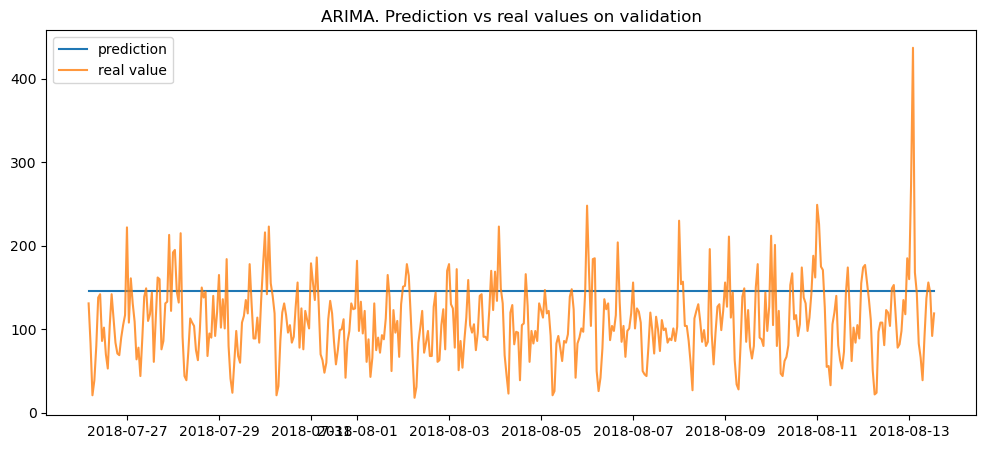

In [44]:
plt.figure(figsize=(12,5))
plt.plot(ar_pred, label='prediction')
plt.plot(valid_ar['num_orders'], label='real value', alpha=.8)
plt.legend()
plt.title('ARIMA. Prediction vs real values on validation')
plt.show()

ARIMA предсказывает константой, что однозначно хуже по сравнению с другими испрбованными моделями, так что ARIMA не подходит.

## Тестирование

Лучший скоринг на кросс-валидации показала модель RandomForestRegressor. Используем её для измерения RMSE на тесте.

In [45]:
test_preds = rf_grid_search.predict(test.drop(columns='num_orders'))
np.sqrt(mean_squared_error(test['num_orders'], test_preds))

39.89060367190593

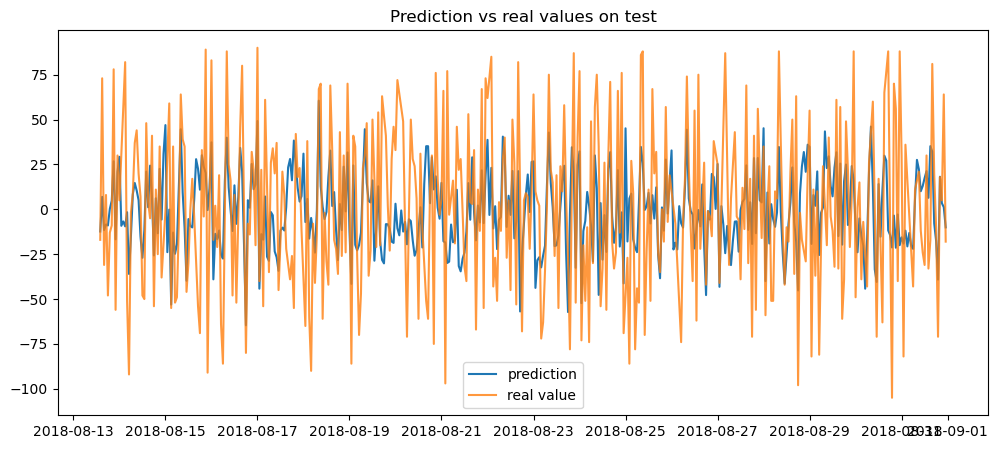

In [46]:
plt.figure(figsize=(12,5))
plt.plot(pd.Series(test_preds, index=test.index), label='prediction')
plt.plot(test['num_orders'], label='real value', alpha=.8)
plt.legend()
plt.title('Prediction vs real values on test')
plt.show()

Итоговое значение RMSE ~40.  
Предсказания характеризутся большей "плавностью" в отличие от реальных значений. Ранее мы вяснили, что это может объяняться наличием шумов в данных.

## Вывод

В ходе данной работы:
- Данные открыты, проверены, ресемплированы
- Данные приведены к стационарности
- Удалены выбросы
- Проверена сезонность, выбраны features для обучения
- Обучено 3 модели: линейная регрессия, случайный лес и ARIMA
- Лучшая модель по валидационной выборке: RandomForestRegressor
- Значение RMSE на тесте: ~40